In [1]:
#!/usr/bin/env python3

'''
Code to check `norm(A-Ahat)/norm(A)` with RPCholesky
'''

import numpy as np
import dpp_lra, rp_cholesky, unif_sample, leverage_score
from utils import approximation_error
from matrix import PSDMatrix, KernelMatrix
import gallery
import scipy
import meshio
import matplotlib.pyplot as plt


In [2]:
def structured_grid_2d(nx, **kwargs):
    '''
    A structured grid on unit square domain, i.e., [0,1]*[0,1]
    with nx points in each dimension 
    '''
    x = np.linspace(0,1,nx)
    xv, yv = np.meshgrid(x, x)

    X = np.vstack([xv.flatten(), yv.flatten()]).T

    return KernelMatrix(X, **kwargs)

In [3]:
method = rp_cholesky.rp_cholesky
# method = rp_cholesky.greedy
# method = unif_sample.uniform_sample
nx = 50

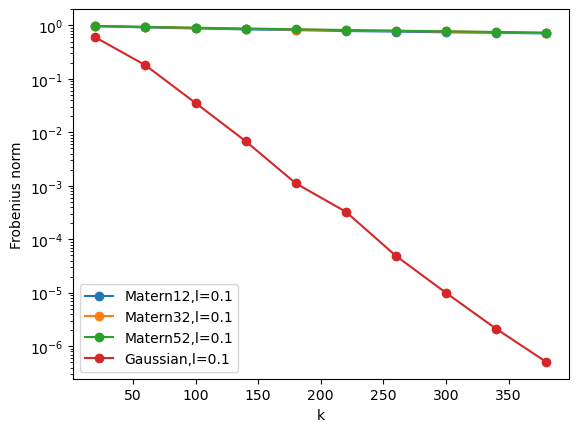

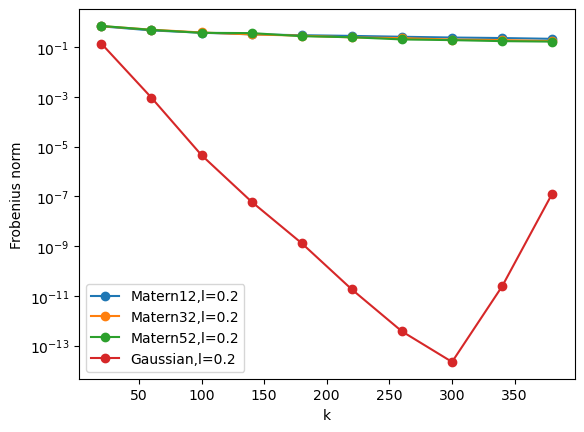

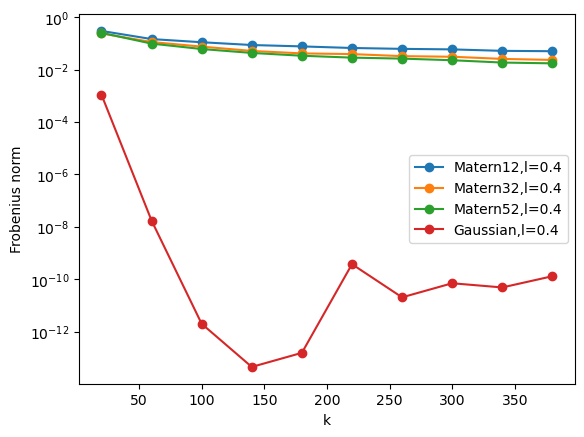

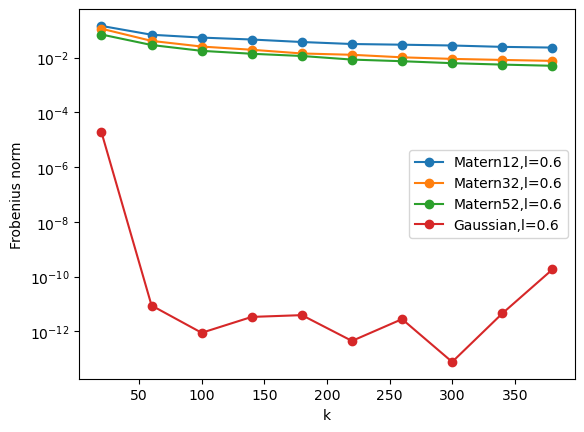

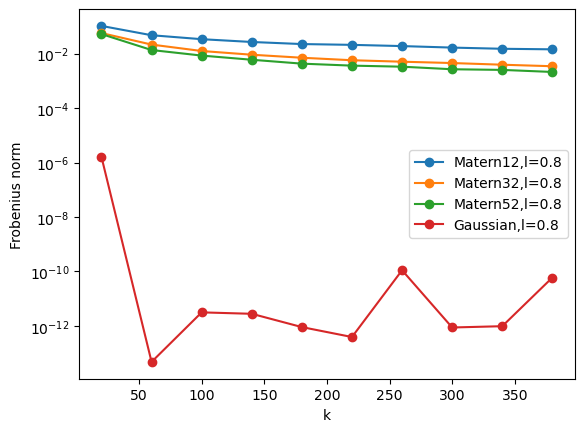

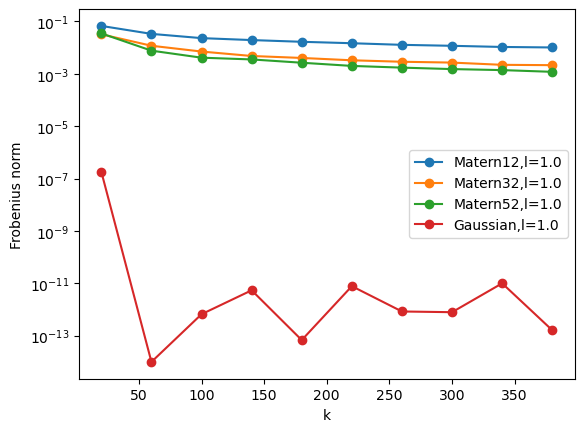

In [4]:
ls = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
ks = np.arange(20,420,40)
for l in ls:
    As = { "Matern12": structured_grid_2d(nx, bandwidth = l, kernel='matern', nu=0.5),
           "Matern32": structured_grid_2d(nx, bandwidth = l, kernel='matern', nu=1.5),
           "Matern52": structured_grid_2d(nx, bandwidth = l, kernel='matern', nu=2.5),
           "Gaussian" : structured_grid_2d(nx, bandwidth = l)}
    fig = plt.figure()
    for matrix_name, A in As.items():
        full_matrix = A[:,:]
        results = np.zeros(ks.shape)
        for (k_index, k) in enumerate(ks):
            F = method(A, k) # RPChokesky approximation of kernel matrix
            approx_matrix = F.F@(F.F.T)
            matrix_diff_norm = np.linalg.norm(approx_matrix-full_matrix)/np.linalg.norm(full_matrix)
            results[k_index] = matrix_diff_norm
        plt.semilogy(ks, results, "-o", label=matrix_name+",l="+str(l))
    plt.xlabel("k")
    plt.ylabel("Frobenius norm")
    plt.legend()